### T32 - Why use Recurrent Neural Network and what are itsApplication?

RNN works very well when there is sequence of data.Example : Predicting a sentence whether it is positive or negative , Time Series Data , Sales Forecasting , Stock Forecasting

##### Why RNN  ?

While using NLP with Machine Learning we use various Text Preprocessing techniques such as BOW,TF-IDF,Word2Vect(Converts Text data into vectors).Then we apply machine learning algorithm on vectors.

In All above Text Preprocessing Techniques --- Sequence information is discarded.
For Example : My Name is Lucky Rathod (Here these whole sentence makes some sense). So when we use above preprocessing techniques.Sentence Sequence information will get discarded which will lead to lower accuracy.

As we know that for applications like CHATBOT - Proper response has to be provided to user with proper sentence , We can't give ans in form of only words . So in these type of applications Sequence information is very much imp.

So to Control Sequence Information we make use of RNN

##### Time Series Application of RNN

RNN will consider the previous time data to predict the future time data.

#### Google Search - Image 

As soon as you search something its corresponding images will also appear

#### Google Captioning 

Will give caption to the image provided 

#### Google Translation from one language to another 

Converting English to French and vice versa because here sequence information is imp

### T33 - Reccurent Neural Network Forward Propogation with Time 

Xit - Input(It can be of any no of dimensions) \
f - Hidden Layers  \
yi pred - output  \
Ot - Output w.r.t time

Along with output we also get output w.r.t time 

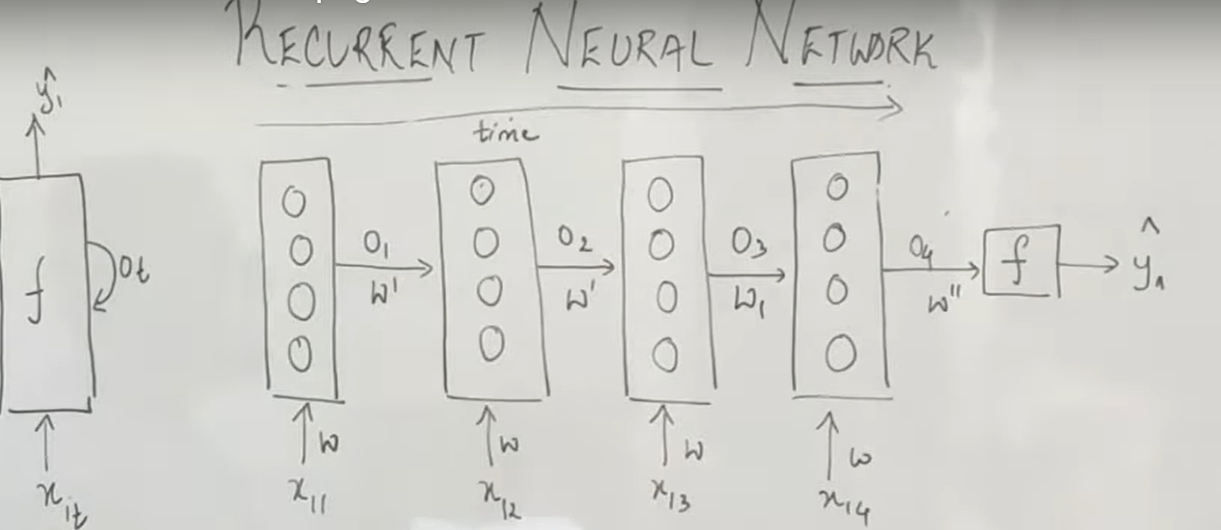

##### NLP usecase - Sentiment Analysis

Suppose we have sentence which contains 4 words

xi - These food is bad \
x11- These , x12 - food , x13 - is , x4 - bad
yi - Negative Review 

Now in RNN , At every t it will process 1 word \
When t =1 it will process 1st word - These , RNN will give o/p for that 1st word and apart from that for Next word (2nd word - food) , whatever was the output for 1st word will also be send to the next word.These process will continue for each and every word . So in these way Sequence of information is kept 



#### Forward Propogation

Now Our First word will go to RNN (Which has 100 neurons). Now we know that each and every word will have a vector. \
We will also have weights which will be mutliplied with i/p and then given to hidden layer(100 neurons) which will provide us an output .

So for t=1 , we got output O1 

O1 = In Hidden layer we apply Activation functions on inputs (X11) * weights of first word vector i/p + O0 * W1 .

Now for t=2

We will give our output O1 to the same Hidden Layer (100 Neurons).But at t=2 we will pass our Next Word Vector (x12). \
In Forward Propogation Same weigths which were at t=1 will be assigned at t=2.

But we are also passing O1 , along with these we will also pass different Weight W1 (Got initialized w.r.t O1).So when RNN Hidden Layer is processed we will get output O2

O2 = Function of X12 * W + O1 * W1 (It is completely dependent on X12 and O1)

Now for t=3

Output of 2nd word will be passed to 3rd word along with Weights (Previous Weight W1) and 3rd word is passed along with W

O3 = Function of X13 * W + O2* W1

Similarly for t=4

O4 = Funtion of X14*W + O3*W1

Once all words of Sentence are completed we pass it through Softmax Activation Function to get final output.

Then we compute Loss Function . And our aim is to reduce LOSS Function

O4 - Dependent on X14 and O3 \
O3 - Dependent on X13 and O2 \
O2 - Dependent on X12 and O1 \
O1 - Dependent on X11 and O0 (Weights Initialized)

Hence Sequence information is always maintained 

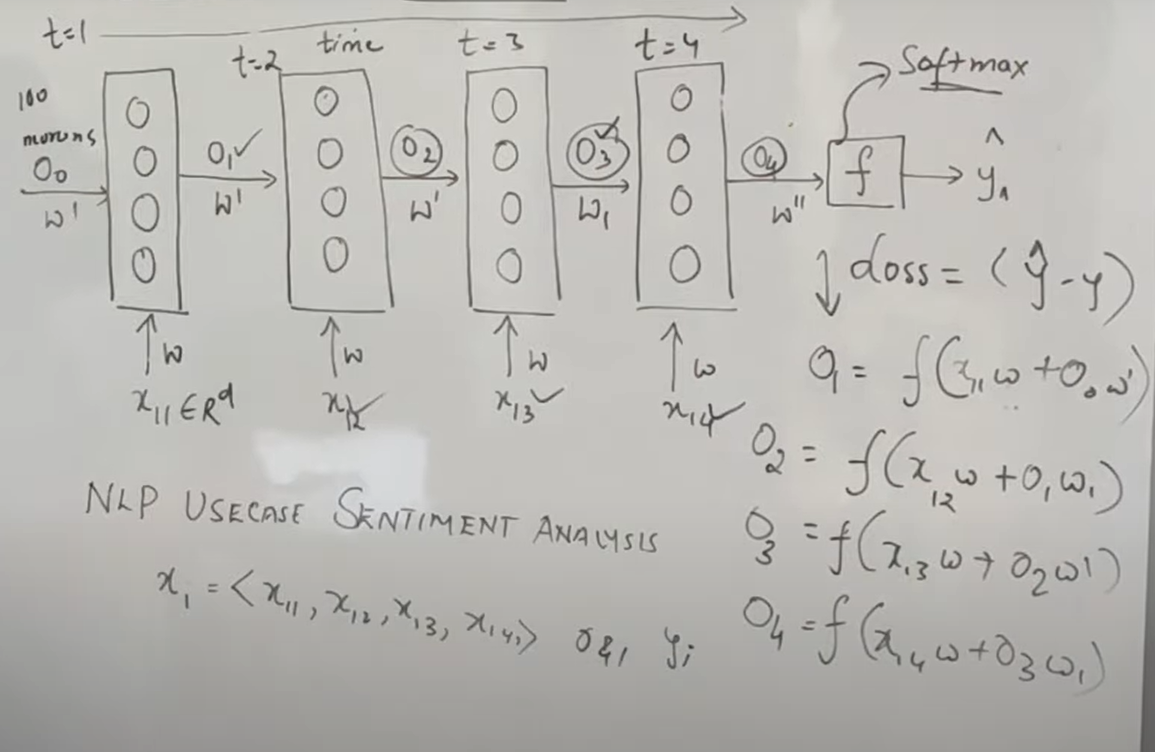

### T34 - Recurrent Neural Network - Backward propogation over Time


Once We calculate our Loss Function we update the WEIGHTS (So that we can reach at Global minimum in Gradient Descent). \
Now in order to reduce Loss Function , We will first take Derivative of y pred . \ 
Now we will update weigths from backwards (Weights of Softmax funtion -W11). \ 

With the help of chain rule we get below \

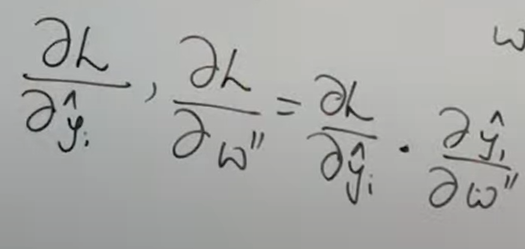

Now we have find out Derivative of W11 . So now we will update W also which is getting multiplied by X14.

O4 Dependent on W , Y pred is dependent on O4 , Loss is dependent on Y pred

With the help of Chain Rule

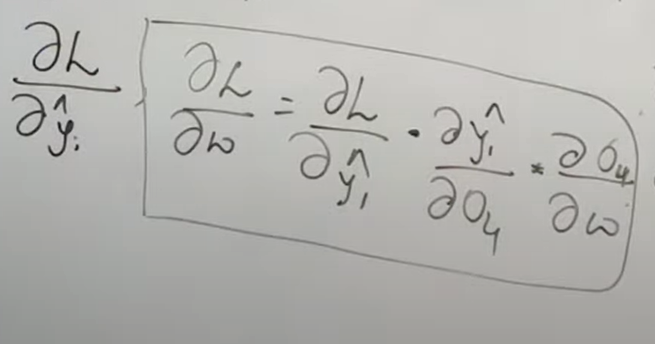

##### Now these is how chain rule is used to update W for every word.

In Backpropogation we just apply derivative to update weigths . These process continues for many iterations .

Weights can be updated with below 

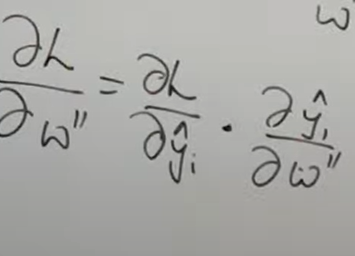

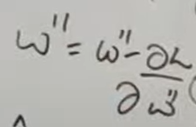

### T34 -- Cuda Toolkit and cudnn

### T35 - Problems in RNN

Suppose we have created an RNN with Forward and Backward Propogation w.r.t time .When we do Backward propogation, Weights will get updated (Derivative w.r.t Chain Rule)

Now in Hidden Layer we use various Activation Function (Sigmoid,Relu)

##### Vanishing Gradient Problem

Changing in Gradient Descent is very small so that it never converges to global minimum.It takes time

When we do backward propogation w.r.t weights . And if we use Sigmoid Activation function in Hidden layer . And when we find out derivative of Sigmoid function . It will be between 0 - 0.25.

But as we go towards W(Weight)  w.r.t X1 . value of derivative of  Sigmoid(0-2.25) becomes very small because Derivative is continously happening.

So when it becomes very small value (It is Negligible) i-e It will never help to converge at Global minimum in Gradient Descent.

These happens when we run Backpropogation so many times

##### Exploding Gradient Problem

If we use RELU Activation function , Derivative of RELU  is always  > 1 . So as we go towards W w.r.t X1 it creates Exploding Gradient Problem .

Means Changing in Gradient Descent is so big that it never reaches global minimum

So to avoid Above Problems we use LSTM Architecture

### T36 - Recurrent Neural Network LSTM

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

LSTM is basically divided into 4 parts 

1. Memory cell
2. Forget Gate
3. Input Gate
4. Output Gate

#### Memory Cell 

It is used to Remembering and Forget Things . It depends on context of Input 

Example : Generate Text 

My Name is Lucky and my age is 22 ------- Now till now RNN should remember that "Lucky" is context we are talking about . Now from onwards whatever next sentence is generated after 22 , It all depends on "LUCKY"

Similarly for forgetting

My name is LUCKY and my age is 22 . MY brother name is kapil .----- Now RNN will forget / remember "Lucky" and also remember "Kapil" as new context

W.r.t Architecture ----- Pointwise operation is done on Input and output of previous

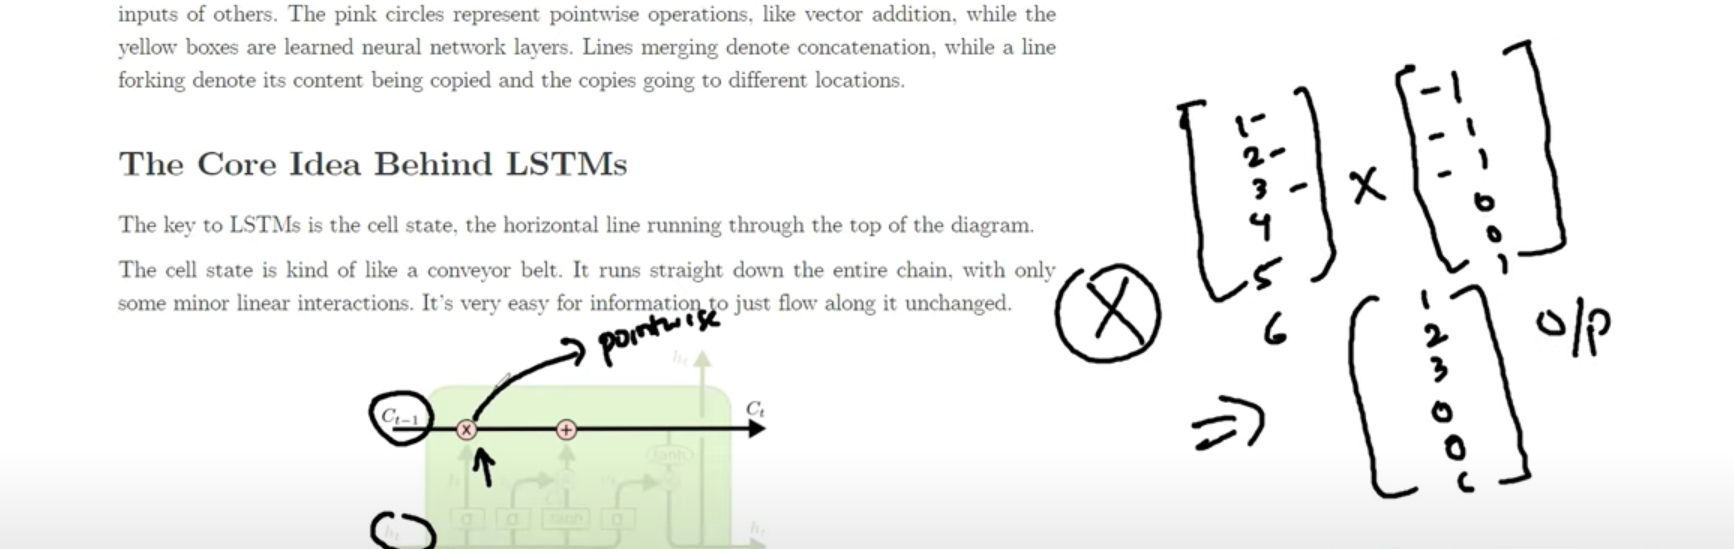

000 in above Vector represents Forgetting the Information.If the context is changed in the new input provided. 
It will be 111 in above vector if the context is not changed in the new input provided 

##### Addition Operation

LSTM will either forget or remember some information in Memory cell , But we also need to continously add or Remember some information as the new input arrives.

For Example: My brother name is "Kapil" . We are adding new information over here .

These is how Operation are performed in Memory cell


#### Forget Gate

Here we concatenate previous output and current input . We also have weigths assigned with previous output and current input.
So W is combination of both weights 

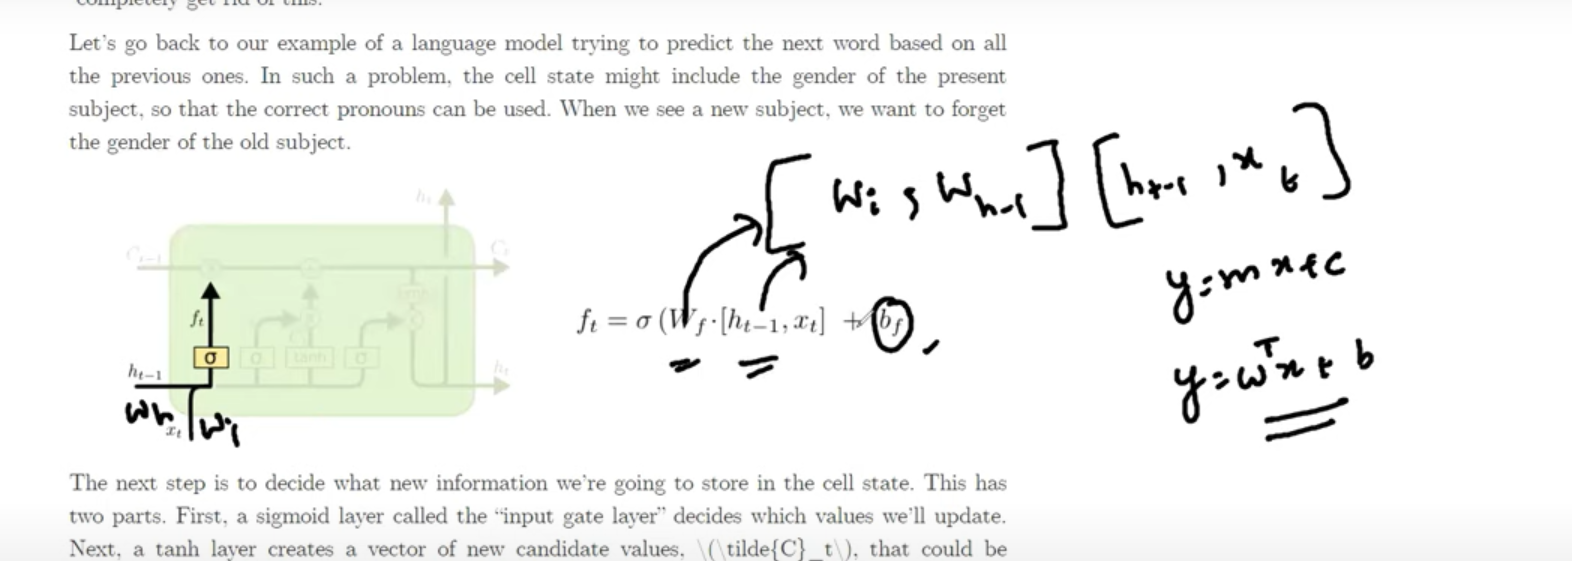

Sigmoid Activation function always gives value between 0 and 1 . So whenever there is change in Context i-e Change in Vector is Words .


If vector is similar we will get more no of 1's in output of Forget gate .It means that context has not changed . So when it reaches memory cell . We know that when POINT Operation is performed w.r.t 1's . It will not Forget , It will remember the CONTEXT .

If vecotrs are not similar then there will be 0's WHICH indicates that we need to forget the previous context when POINT OPERTAION is performed , Because there is change in context.Some imformation will be remembered and some will be forgetted

### Input Gate

###### What new information to be added  for Addition operation in memory cell 

tanh -- -1 to +1

Here also we are performing Pointwise operation with
1. Same sigmoid operation which we performed in Forget gate 0 - 1
2. tanh operation performed on i/p  -1 - 1 

After Point wise Operation , Whichever value are near to 1 , Only that will be added


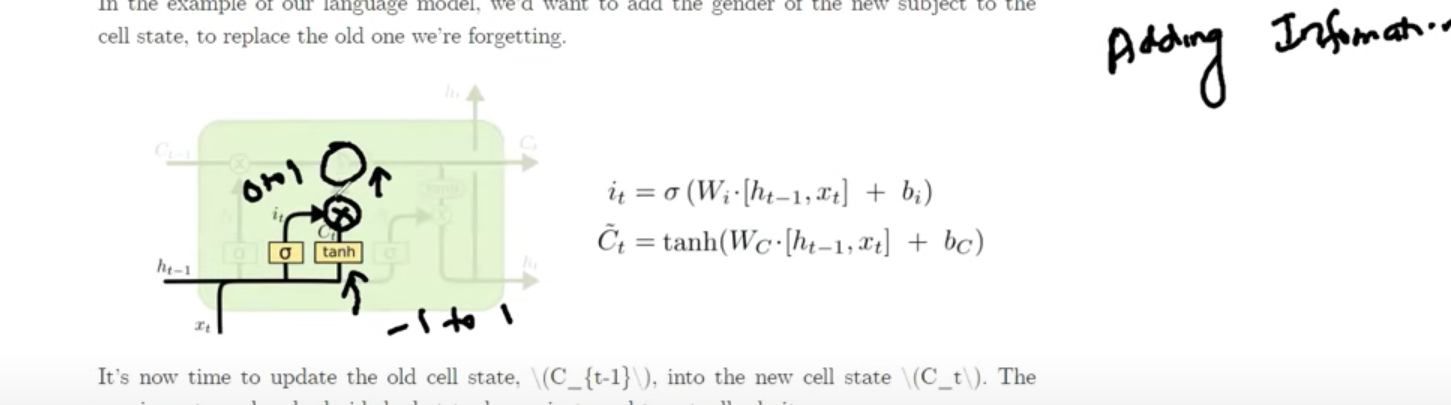

### Output  Gate

Whatever information is there in Memory cell , We will apply tanh (-1 to 1) and its output will be given to Pointwise operation along with Sigmoid Function similar to Forget Gate

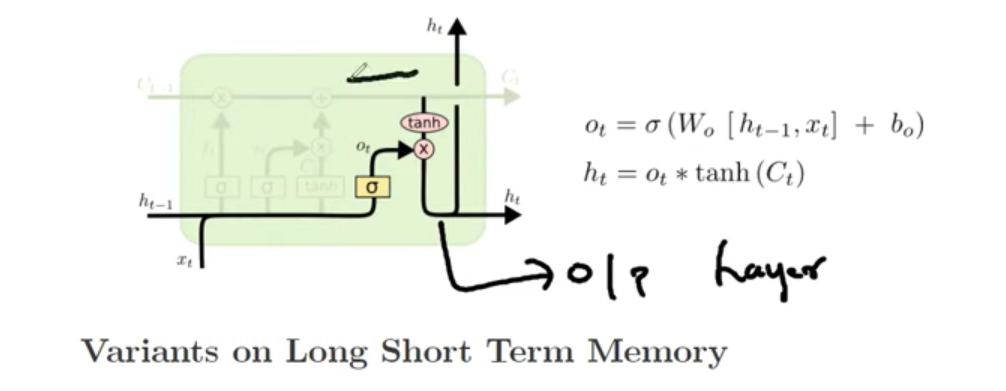

#### Since we using Sigmoid Activation function, The whole cell will be skipped if there is no meaning full information or there is no change in context ---- ct and ct-1 are same

### T37 - Word Embeddings - Text Preprocessing Level 3

We already know BOW (No semantic Information) ,TFIDF (Bit of Semantic Information is perserved).

To preserve Semantic Information Word Embeddings Techniques are used 
1. Word2Vect
2. Glove

##### Word Representation

###### One Hot Representation  ---- BOW Model

Assume we have a dictionary of 10000 words . \ 
Example - Man word is present at 5000th location. Now to convert these word (Man) into vector . All other values will be 0 and 5000th location of vector will be 1.

Woman - 9000th location . Convert these word to vector . All values other than 9000th will be 0

For Each word , Vector of dimension 10000 is created will 0's other than location of that word .

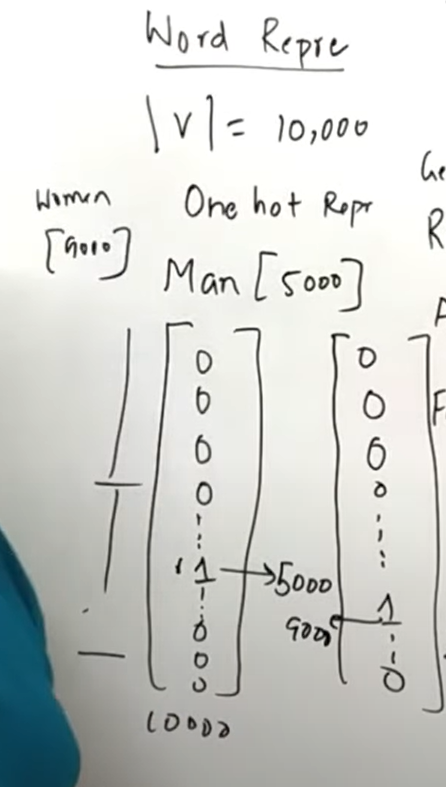


#### Disadvantage

1. It creates a sparse matrix , Becomes difficult to generalize Vectors.
2. Its very difficult to find similar words - No Semantic Information 


In order to overcome above Disadvantages -- Word Embedding Techniques are used

##### Word Embedding --- Feature Representation Concept of Word Embedding

We will try to convert these words (Boy,Girl,King,Queen,Apple,Mango) into vectors based on Certain Features.

Suppose we have around 300 Features (Gender,Royal,Age,Food .....)

Now we know that Gender feature is related to (Boy,Girl,King,Queen) Word -- So value will be High w.r.t these Words . \
Similarly with Royal Feature - Only related to (King,Queen) .

So instead of creating One hot representation , here we are creating Featurize Representation.

For Each Word , vector will be created based on the Features

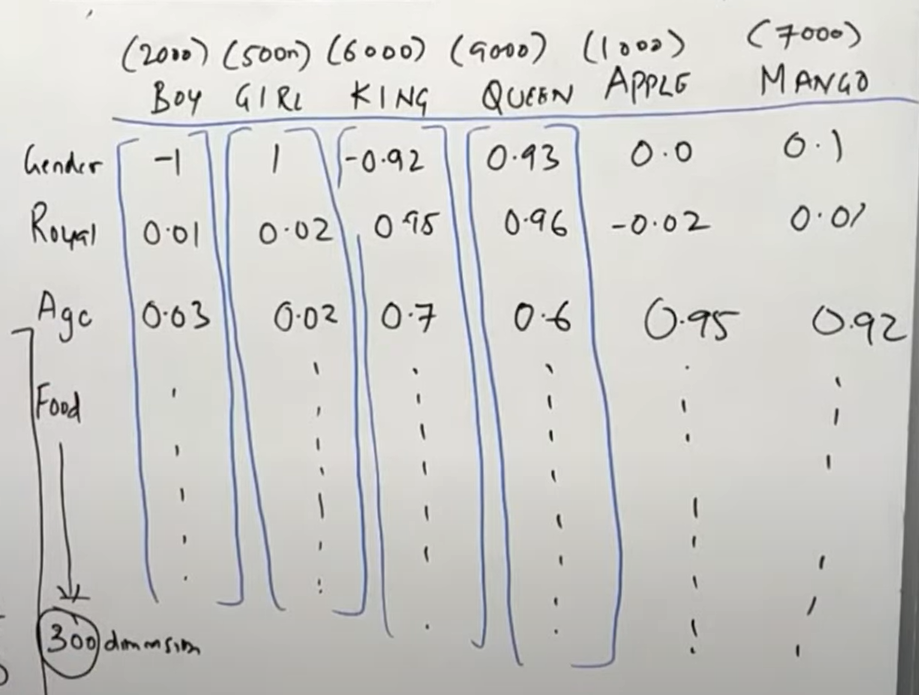

For Example : Boy Word will be represented with vector of 300 Dimensions (w.r.t Features)

Hence in Word Embedding - Feature Representation we have Lower Dimension with Dense Matrix .


##### Cosine Similarity 

It helps to find Similarity between two vectors

Boy (x1) -> Girl (x2)  === x1 - x2 (Subtracting both the vectors of 300 Dimension)

Similarly When we find Similarity between KING -> Queen == x1 - x2 = Value will be same as vector of BOY -> GIRL

When we find Cosine Similarity between both vectors it will be very less , So we can say that King -> Queen

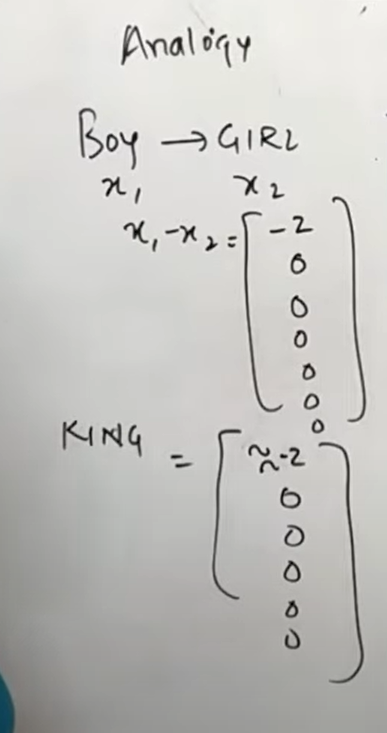

When we convert 300d to 2d you will see that King-> Queen will be near, Boy girl will be near etc

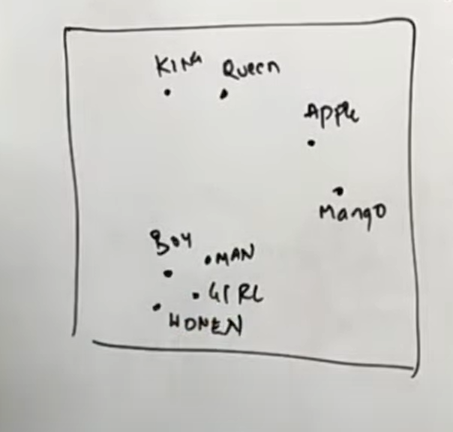

##### With the help of Embedding Layer of Keras , We can convert the text into Feaure Representation

### T38 - Word Embedding - Practical Implementation using Keras

When we use Embedding Layer in KERAS .

Example : Boy is Good

Firstly One hot Representation is done for each and every word [Boy is at 2000th location of Vocabulary of 10000 words ]
Value will be 1 at 2000th location everything else will be 0

Keras has one_hot function to convert the word into vector , Vocabulary size is imp based on that vector length is conidered

When we apply One_Hot representation on above sentence we will get index value of each word [2000,4000,5500] 

Now we will pass these [2000,4000,5500] to Embedding Layer (Converts it into vector representation).

##### Embedding Layer  ---- Feature Representation

Along with [2000,4000,5500] we also have to pass No of Dimensions (300d) . \
So each and every word will be represented by Vector of that no of Dimensions

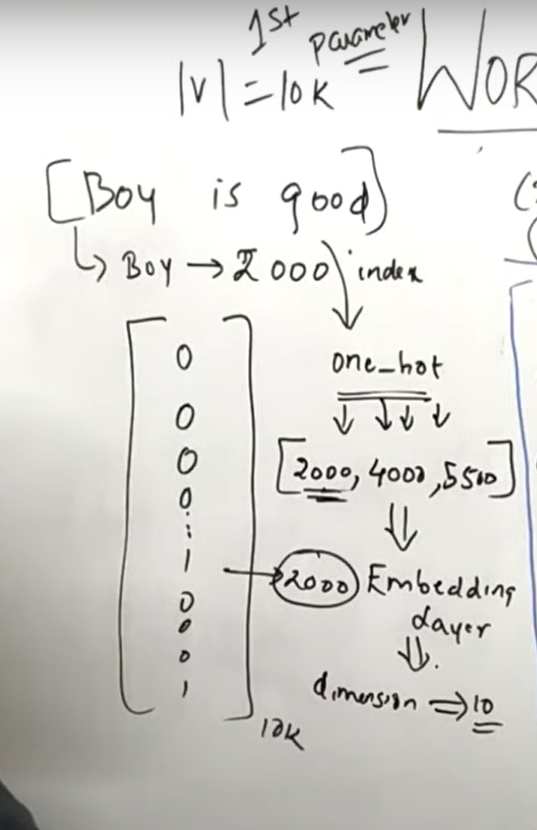

For each and every word of above sentence , Vector of 300d (Features were considered to create these vector )is created 

### T39 - How to develop neural network model efficiently

See practical Implementation

### T40 - Fake News Classifier using LSTM

See practical Implementation

### T40 A - Simple Text classification using both Word Embedding (Learning your own , Pre trained)

See practical Implementation

### T41 - Stock Price Prediction/Forecasting using Stacked LSTM

See practical Implementation

### T42 - Bi Directional RNN Intuition

Now to predict output of y13 hat or pred - We need to consider x13 , x12 , x11. All the information in Simple RNN is passed in unidirectional way . We cannot get the information of feature words .

Example : Sentence is "He likes eating"

Now after these if we have to predict next word i-e Future word . There are many words like "He likes eating apple","He likes eating mango" etc .. In unidirectional RNN these is not possible. We cannot get information of future words in RNN.

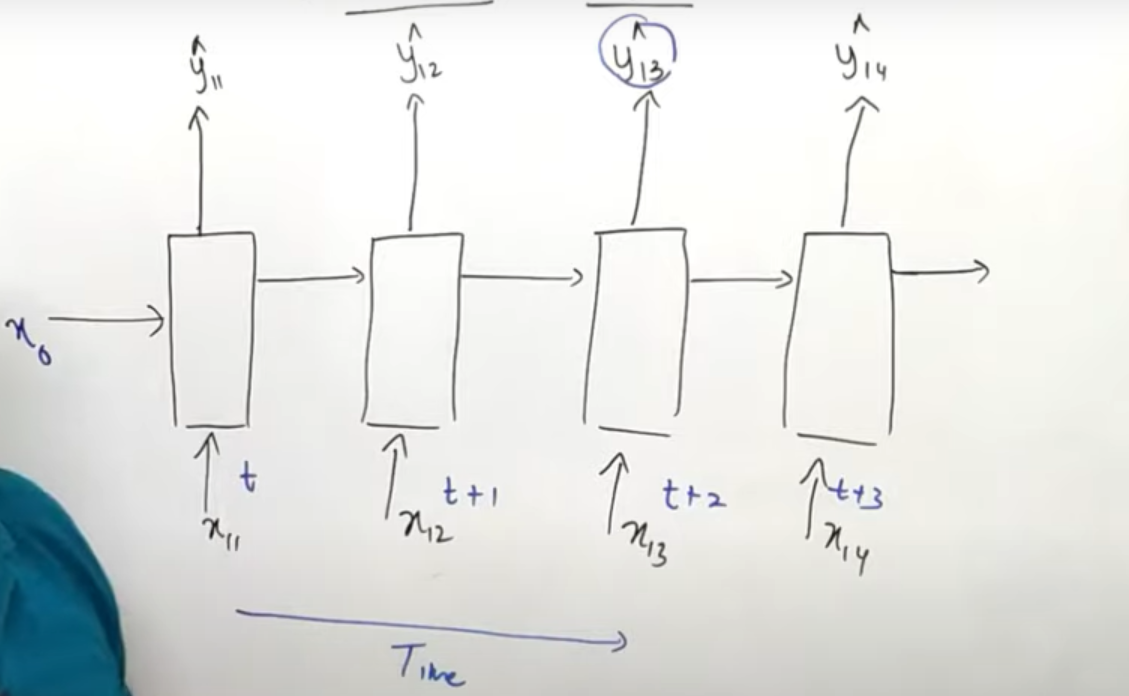

To overcome above problem we can use Bi Directional RNN 

### Bidirectional RNN 

It contains both Forward RNN and backward RNN

In backward RNN , x14 will be input to right most rnn hidden layer , x13 will be input to next right most Rnn and so on.
Output of each RNN of Backwards will be combines with output of forward RNN. After which Sigmoid Activation function is used to get final output 

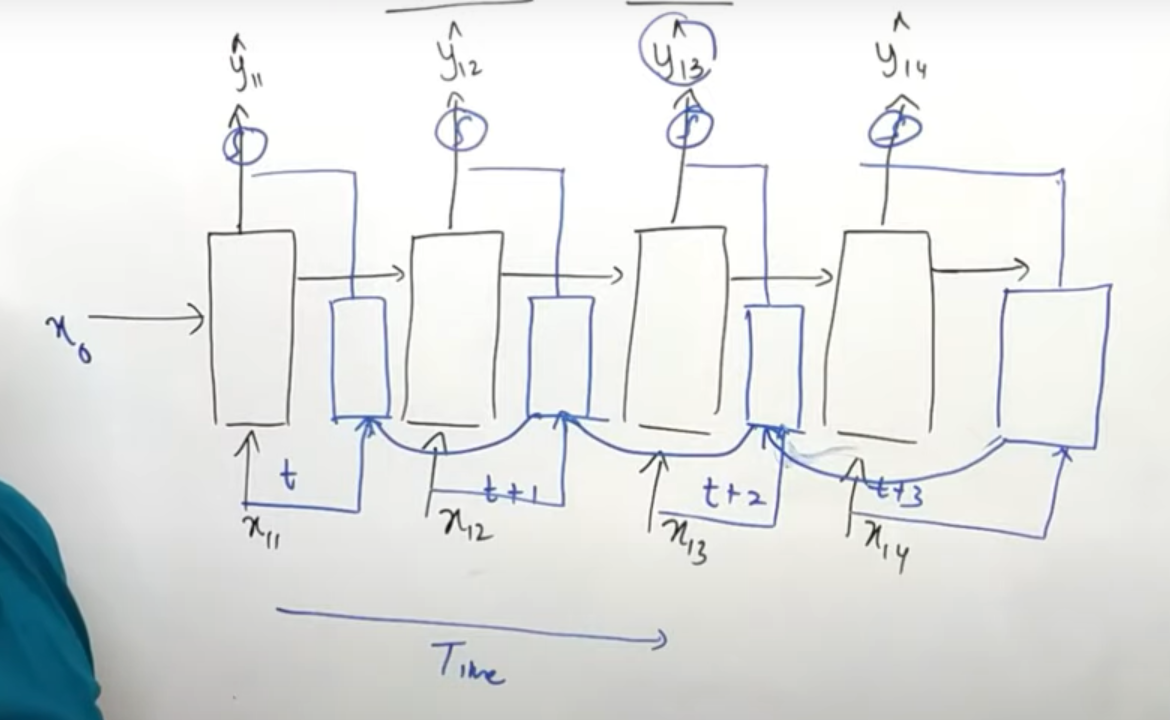

So Now in Bidirectional RNN , When we have to compute value of Y13 HAT , we have information of x11,x12,x13 (through forward rnn) and we also have information of x14 (through backward rnn)

#### When to use Birdirectional RNN

1. NLP problems (Where output is to be predicted based on previous and future words).

#### Not to use Bidirectional RNN 

1. Where we dont get whole input -- Speech Recognition

Slow as compared to Normal LSTM 

### T43 - Implementing Kaggle Fake News Classifier using Bidirectional LSTM

See Practical Implementation

### T43 A - Implementing kaggle Fake News Classifier using Pretrained Embeddings

See practical implementation